In [1]:
%cd ..
import os
import time

/data/apperception/apperception


In [2]:
from apperception.database import database
from apperception.world import empty_world
from apperception.utils import F
from apperception.predicate import camera, objects
from optimized_ingestion.utils.preprocess import preprocess
database.connection
from optimized_ingestion.cache import disable_cache
# disable_cache()

/home/local/apperception/.installs/mambaforge/envs/apperception/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
YOLOv5 🚀 2022-11-23 Python-3.10.8 torch-1.13.0+cu117 CUDA:0 (NVIDIA TITAN Xp, 12190MiB)

Using cache found in /data/apperception/apperception/weights/ultralytics_yolov5_master


Using cuda:0


YOLOv5 🚀 2022-11-30 Python-3.10.8 torch-1.13.0+cu117 CUDA:0 (NVIDIA TITAN Xp, 12190MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
NUSCENES_PROCESSED_DATA = "NUSCENES_PROCESSED_DATA"
if NUSCENES_PROCESSED_DATA in os.environ:
    DATA_DIR = os.environ[NUSCENES_PROCESSED_DATA]
else:
    DATA_DIR = "/work/apperception/data/nuScenes/full-dataset-v1.0/Mini"
NUSCENES_RAW_DATA = "NUSCENES_RAW_DATA"
if NUSCENES_RAW_DATA in os.environ:
    RAW_DATA_DIR = os.environ[NUSCENES_RAW_DATA]
else:
    RAW_DATA_DIR = "/work/apperception/data/raw/nuScenes/full-dataset-v1.0/Mini"

In [4]:
import cv2
from os.path import exists
def construct_video(frames, size=(1600, 900), base=False, vid_name=None, vid_prefix=False):
    unique_frames = []
    for f in frames:
        if f not in unique_frames:
            unique_frames.append(f)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    vid_name = "./outputs/fig13_"+vid_name if vid_name else f"./outputs/{'fig13_base' if base else 'fig13_optimized'}.mp4"
    display_video = cv2.VideoWriter(vid_name,fourcc, 1, size)
    for frame in unique_frames:
        if vid_prefix:
            img_path = os.path.join(RAW_DATA_DIR, 'sweeps/CAM_FRONT', frame)
            if not exists(img_path):
                img_path = os.path.join(RAW_DATA_DIR, 'samples/CAM_FRONT', frame)
        else:
            img_path = os.path.join(RAW_DATA_DIR, frame)
        img = cv2.imread(img_path)
        display_video.write(img)

    display_video.release()

In [5]:
name = 'ScenicWorld'
world = empty_world(name=name)

obj1 = objects[0]
obj2 = objects[1]
cam = camera

world = world.filter(
    (obj1.id != obj2.id) &
    (F.like(obj1.type, 'car') | F.like(obj1.type, 'truck')) &
    (F.like(obj2.type, 'car') | F.like(obj2.type, 'truck')) &
    F.angle_between(F.facing_relative(cam.ego, F.road_direction(cam.ego)), -15, 15) &
    (F.distance(cam.ego, obj1.trans@cam.time) < 50) &
    (F.view_angle(obj1.trans@cam.time, cam.ego) < 70 / 2.0) &
    (F.distance(cam.ego, obj2.trans@cam.time) < 50) &
    (F.view_angle(obj2.trans@cam.time, cam.ego) < 70 / 2.0) &
    F.contains_all('intersection', [obj1.trans, obj2.trans]@cam.time) &
    F.angle_between(F.facing_relative(obj1.trans@cam.time, cam.ego), 40, 135) &
    F.angle_between(F.facing_relative(obj2.trans@cam.time, cam.ego), -135, -50) &
    (F.min_distance(cam.ego, 'intersection') < 10) &
    F.angle_between(F.facing_relative(obj1.trans@cam.time, obj2.trans@cam.time), 100, -100)
)


In [6]:
preprocess(world, DATA_DIR, ['scene-0757-CAM_FRONT'])

YOLOv5 🚀 2022-11-23 Python-3.10.8 torch-1.13.0+cu117 CUDA:0 (NVIDIA TITAN Xp, 12190MiB)

Using cache found in /data/apperception/weights/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-30 Python-3.10.8 torch-1.13.0+cu117 CUDA:0 (NVIDIA TITAN Xp, 12190MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


scene-0757-CAM_FRONT --------------------------------------------------------------------------------
Stage:  DecodeFrame.ParallelDecodeFrame
None
237
  filtered frames: 100.0%
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Stage:  Detection2D.YoloDetection
None
237
  filtered frames: 100.0%
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Stage:  Detection3D.From2DAndRoad


237it [00:00, 3304.03it/s]


None
237
  filtered frames: 100.0%
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Stage:  Tracking2D.StrongSORT
None
237
  filtered frames: 100.0%
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Stage:  Tracking3D.From2DAndRoad


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:00<00:00, 7731.65it/s]

None
237
  filtered frames: 100.0%
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Stage:  SegmentTrajectory.FromTracking3D


None
237
  filtered frames: 100.0%
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
obj_id 1
obj_id 5
obj_id 10
obj_id 11
obj_id 14
obj_id 19
obj_id 23
obj_id 25
obj_id 26
obj_id 37
obj_id 43
obj_id 44
obj_id 47
obj_id 55
obj_id 60
obj_id 61
obj_id 66
obj_id 73
obj_id 74
obj_id 75
obj_id 82
obj_id 85
obj_id 93
obj_id 95
obj_id 98
obj_id 101
obj_id 104
obj_id 105
obj_id 109
obj_id 114
obj_id 116
obj_id 119
obj_id 120
obj_id 121
obj_id 107
obj_id 125
obj_id 126
obj_id 131
obj_id 144
obj_id 147
obj_id 150
obj_id 159
obj_id 161
obj_id 166
obj_id 169
obj_id 170
obj_id 174
obj_id 177
obj_id 181
obj_id 182
Time taken to insert trajectories: 0.27121829986572266
info found [[5, 1065.0, 270.0, 30.0, 69.0], [19, 1032.0, 273.0, 26.0, 63.0], [37, 560.0, 440.0, 67.0, 33.0], [44, 629.0, 425.0, 48.0, 40.0], [73, 1

In [8]:
frames_116 = ['sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120012404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120112404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120162404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120262404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120362404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120412404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120512404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120612404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120662404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120762404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120862404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120912404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121012404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121112404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121162404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121262404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121362404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121412404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121512404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121612404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121662404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121762404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121862404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121912404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122012404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122112404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122162404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122262404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122362404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122412404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122512404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122612404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122662404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122762404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122862404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122912404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123012404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123112404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123162404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123262404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125362404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125412404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126412404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126512404.jpg']
frames_161 = ['sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123412404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123612404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123662404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123762404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123862404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123912404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124012404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124112404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124262404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124362404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124412404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124512404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124612404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124662404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124862404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125112404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125162404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125262404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125362404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125512404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125612404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125662404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125762404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125862404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125912404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126012404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126112404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126162404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126262404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126362404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126412404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126612404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126762404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126862404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126912404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657127112404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657127162404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657127362404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657127412404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657127662404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657127762404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657127862404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657127912404.jpg', 'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657128012404.jpg', 'samples/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657128112404.jpg']
for f in frames_116:
    if f in frames_161:
        print(f)

sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125362404.jpg
sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657126412404.jpg


In [7]:
base_query_start = time.time()
id_time_camId_filename_base = world.get_id_time_camId_filename(2)
print(f'based query time: {time.time()-base_query_start}')

execute: filter
execute: get_id_time_camId_filename
get_id_time_camId_filename 
        SELECT t0.itemId,t1.itemId, cameras.timestamp, cameras.cameraId, cameras.filename
        FROM (SELECT * FROM item_general_trajectory) as t0
        JOIN (SELECT * FROM item_general_trajectory) as t1 USING (cameraId)
        JOIN Cameras USING (cameraId)
        WHERE ((t0.itemId<>t1.itemId) AND (t0.objectType LIKE 'car' OR t0.objectType LIKE 'truck') AND (t1.objectType LIKE 'car' OR t1.objectType LIKE 'truck') AND angleBetween(facingRelative(egoHeading,roadDirection(egoTranslation,egoHeading)),-15,15) AND (ST_Distance(egoTranslation,valueAtTimestamp(t0.translations,timestamp))<50) AND (viewAngle(valueAtTimestamp(t0.translations,timestamp),egoHeading,egoTranslation)<35.0) AND (ST_Distance(egoTranslation,valueAtTimestamp(t1.translations,timestamp))<50) AND (viewAngle(valueAtTimestamp(t1.translations,timestamp),egoHeading,egoTranslation)<35.0) AND (EXISTS(SELECT 1
            FROM SegmentPolygon
     

In [9]:
id_time_camId_filename_base

[('scene-0757-CAM_FRONT_obj_44',
  'scene-0757-CAM_FRONT_obj_23',
  datetime.datetime(2018, 8, 30, 12, 25, 11, 412404, tzinfo=datetime.timezone.utc),
  'scene-0757-CAM_FRONT',
  'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657111412404.jpg'),
 ('scene-0757-CAM_FRONT_obj_44',
  'scene-0757-CAM_FRONT_obj_23',
  datetime.datetime(2018, 8, 30, 12, 25, 11, 762404, tzinfo=datetime.timezone.utc),
  'scene-0757-CAM_FRONT',
  'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657111762404.jpg'),
 ('scene-0757-CAM_FRONT_obj_44',
  'scene-0757-CAM_FRONT_obj_61',
  datetime.datetime(2018, 8, 30, 12, 25, 12, 862404, tzinfo=datetime.timezone.utc),
  'scene-0757-CAM_FRONT',
  'sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657112862404.jpg'),
 ('scene-0757-CAM_FRONT_obj_44',
  'scene-0757-CAM_FRONT_obj_61',
  datetime.datetime(2018, 8, 30, 12, 25, 14, 362404, tzinfo=datetime.timezone.utc),
  'scene-0757-CAM_FRONT',
  'sweeps/CAM_FRONT/n008-2018-08-30-15

In [10]:
base_results = [e[4] for e in id_time_camId_filename_base]
construct_video(base_results, base=True)

In [11]:
compare_base = set([os.path.basename(e) for e in base_results])
compare_base

{'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657111412404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657111762404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657112862404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657114362404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657114612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657115012404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657115112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657115162404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657116112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657117662404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657117762404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657117912404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657118012404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657118112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657118262404.j

In [12]:
groundtruth = set(['n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657117612404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657118112404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657118612404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657119112404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657119612404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120112404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120612404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121112404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121612404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122112404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122612404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123112404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123612404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124112404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657127612404.jpg', 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657128112404.jpg'])

In [13]:
groundtruth

{'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657117612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657118112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657118612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657119112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657119612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657121612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657122612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657123612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657124112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657127612404.j

In [14]:
groundtruth - compare_base

{'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657117612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657118612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657119112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657119612404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657120112404.jpg',
 'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657128112404.jpg'}

In [15]:
construct_video(list(groundtruth - compare_base), vid_name="ground_truth_false_negative.mp4", vid_prefix=True)
construct_video(list(compare_base - groundtruth), vid_name="ground_truth_false_positive.mp4", vid_prefix=True)

In [10]:
preprocess(world, DATA_DIR, ['scene-0757-CAM_FRONT'], base=False)

YOLOv5 🚀 2022-11-23 Python-3.10.8 torch-1.13.0+cu117 CUDA:0 (NVIDIA TITAN Xp, 12190MiB)

Using cache found in /data/apperception/weights/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-30 Python-3.10.8 torch-1.13.0+cu117 CUDA:0 (NVIDIA TITAN Xp, 12190MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


scene-0757-CAM_FRONT --------------------------------------------------------------------------------
Stage:  InView
237
None
  filtered frames: 97.46835443037975%
......KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Stage:  DecodeFrame.ParallelDecodeFrame


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:03<00:00, 20.04it/s]


None
237
  filtered frames: 97.46835443037975%
......KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Stage:  Detection2D.YoloDetection


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:02<00:00, 110.35it/s]


None
237
  filtered frames: 97.46835443037975%
......KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Stage:  Detection2D.ObjectTypeFilter
None
237
  filtered frames: 97.46835443037975%
......KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Stage:  Detection3D.From2DAndRoad


237it [00:00, 3339.02it/s]


None
237
  filtered frames: 97.46835443037975%
......KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Stage:  DetectionEstimation
ego_speed:  1.3581198756421884


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236/236 [00:06<00:00, 34.56it/s]
YOLOv5 🚀 2022-11-23 Python-3.10.8 torch-1.13.0+cu117 CUDA:0 (NVIDIA TITAN Xp, 12190MiB)



number of skipped 9
{None: 228}
total_run_time 6.833234548568726
total_detection_time 6.592911958694458
total_generate_sample_plan_time 0.16239643096923828
237
237
  filtered frames: 96.20253164556962%
......KK..KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK.
Stage:  Tracking2D.StrongSORT
Successfully loaded pretrained weights from "/data/apperception/apperception/weights/osnet_x0_25_msmt17.pt"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:08<00:00, 29.13it/s]


None
237
  filtered frames: 96.20253164556962%
......KK..KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK.
Stage:  Tracking3D.From2DAndRoad


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:00<00:00, 9076.84it/s]


None
237
  filtered frames: 96.20253164556962%
......KK..KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK.
Stage:  SegmentTrajectory.FromTracking3D
None
237
  filtered frames: 96.20253164556962%
......KK..KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK.
obj_id 7
obj_id 8
obj_id 9
obj_id 15
obj_id 20
obj_id 22
obj_id 25
obj_id 29
obj_id 32
obj_id 35
obj_id 37
obj_id 39
obj_id 44
obj_id 46
obj_id 47
obj_id 50
obj_id 51
obj_id 52
obj_id 54
obj_id 61
obj_id 67
obj_id 69
obj_id 73
obj_id 77
Time taken to insert trajectories: 0.1197052001953125
info found []
total preprocess time 29.518553256988525


In [11]:
optimized_query_start = time.time()
id_time_camId_filename = world.get_id_time_camId_filename(2)
print(f'optimized query time: {time.time()-optimized_query_start}')

execute: filter
execute: get_id_time_camId_filename
get_id_time_camId_filename 
        SELECT t0.itemId,t1.itemId, cameras.timestamp, cameras.cameraId, cameras.filename
        FROM (SELECT * FROM item_general_trajectory) as t0
        JOIN (SELECT * FROM item_general_trajectory) as t1 USING (cameraId)
        JOIN Cameras USING (cameraId)
        WHERE ((t0.itemId<>t1.itemId) AND (t0.objectType LIKE 'car' OR t0.objectType LIKE 'truck') AND (t1.objectType LIKE 'car' OR t1.objectType LIKE 'truck') AND angleBetween(facingRelative(egoHeading,roadDirection(egoTranslation,egoHeading)),-15,15) AND (ST_Distance(egoTranslation,valueAtTimestamp(t0.translations,timestamp))<50) AND (viewAngle(valueAtTimestamp(t0.translations,timestamp),egoHeading,egoTranslation)<35.0) AND (ST_Distance(egoTranslation,valueAtTimestamp(t1.translations,timestamp))<50) AND (viewAngle(valueAtTimestamp(t1.translations,timestamp),egoHeading,egoTranslation)<35.0) AND (EXISTS(SELECT 1
            FROM SegmentPolygon
     

In [12]:
optimized_results = [e[4] for e in id_time_camId_filename]
construct_video(optimized_results)

In [13]:
false_negative = [f for f in base_results if f not in optimized_results]
print(len(false_negative))
construct_video(false_negative, vid_name="false_negative.avi")

2


In [14]:
false_positive = [f for f in optimized_results if f not in base_results]
print(len(false_positive))
construct_video(false_positive, vid_name="false_positive.avi")

1


In [15]:
# [e for e in id_time_camId_filename if e[4] in false_positive]

In [1]:
investigation = [[5, 1065.0, 270.0, 30.0, 69.0], [19, 1032.0, 273.0, 26.0, 63.0], [37, 560.0, 440.0, 67.0, 33.0], [44, 629.0, 425.0, 48.0, 40.0], [73, 1070.0, 337.0, 37.0, 28.0], [82, 858.0, 307.0, 21.0, 69.0], [104, 1033.0, 272.0, 54.0, 63.0], [116, 316.0, 455.0, 296.0, 95.0], [161, 316.0, 454.0, 302.0, 94.0]]

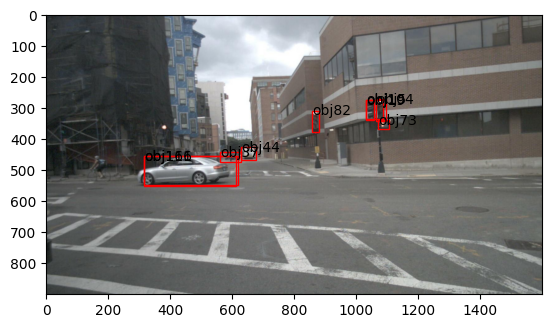

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open('/work/apperception/data/raw/nuScenes/full-dataset-v1.0/Mini/sweeps/CAM_FRONT/n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535657125412404.jpg')

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
for obj in investigation:
    obj_id = obj[0]
    x,y,w,h = obj[1:5]
    plt.text(x, y+15, 'obj'+str(obj_id))
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()